<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 8.7 KB
None
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
          total_bill   tip     sex smoker  day    time  size
subjects                                                    
0              16.99  1.01  Female     No  Sun  Dinner     2
1              10.34  1.66    Male     No  Sun  Dinner     3
2              21.01  3.50    Male     No  Sun  Dinner     3
   total_bill   tip     sex smoker  day    time  size
0     

/home/takanori/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/takanori/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



          total_bill   tip smoker  day    time  size
subjects                                            
0              16.99  1.01     No  Sun  Dinner     2
1              10.34  1.66     No  Sun  Dinner     3
2              21.01  3.50     No  Sun  Dinner     3
3              23.68  3.31     No  Sun  Dinner     2
4              24.59  3.61     No  Sun  Dinner     4
       total_bill       tip      size
count    244.0000  244.0000  244.0000
mean      19.7859    2.9983    2.5697
std        8.9024    1.3836    0.9511
min        3.0700    1.0000    1.0000
25%       13.3475    2.0000    2.0000
50%       17.7950    2.9000    2.0000
75%       24.1275    3.5625    3.0000
max       50.8100   10.0000    6.0000
       total_bill      tip     size
count     49.0000  49.0000  49.0000
mean      19.8716   2.8367   2.3673
std        8.3002   1.0695   0.6980
min        7.5600   1.1700   1.0000
25%       14.5200   2.0000   2.0000
50%       17.8200   3.0000   2.0000
75%       23.3300   3.4800   3.000

,0,1,2,3,4
0,4.9060,2.2982,0.3171,0.6233,2.9347
1,1.3004,3.9081,1.7277,3.6180,4.5433
2,3.9950,3.4114,4.9598,2.4877,3.4502
3,3.0708,2.9717,2.3535,4.8813,2.3571
4,2.3833,4.8067,0.8309,3.8958,1.2640
5,2.7226,0.7773,2.1826,0.1273,3.7380
6,4.8091,4.6357,4.1217,0.6418,0.2165
7,3.1994,3.5507,1.0780,0.5956,4.2785


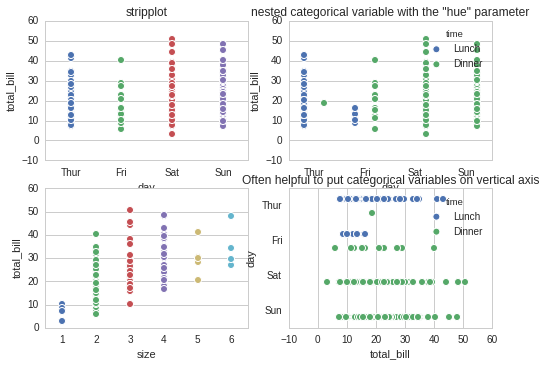

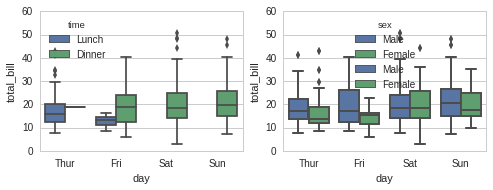

In [8]:
#%% Main funcions: stripplot(), boxplot()
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import title,subplot,figure

import os
import sys
import seaborn as sns
import pandas as pd
from scipy import stats, integrate

%matplotlib inline
mpl.rcParams['figure.figsize'] = (24,22)

pd.set_option('precision', 5)

sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
#%% sns.displot(data) for univariate distributions
#==============================================================================
# It's useful to divide seabor's categorical plots into two groups: 
# 1. those that show the full distribution of observations within each level
#    of the categorical variable
#        stripplot(), boxplot(), violinplot()
# 2. those that apply a statistical estimation to show a measure of 
#    central tendency and confidence interval
#        barplot(), countplot(), pointplot()
#==============================================================================
#%% stripplot()
figure()
subplot(221)
sns.stripplot(x="day", y="total_bill", data=tips);
title('stripplot')

# nested categorical variable with the "hue" parameter
subplot(222)
sns.stripplot(x="day", y="total_bill", hue="time", data=tips);
title('nested categorical variable with the "hue" parameter')

subplot(223)
sns.stripplot(x="size", y="total_bill", data=tips.sort("size"));

subplot(224)
sns.stripplot(x="total_bill", y="day", hue="time", data=tips);
title('Often helpful to put categorical variables on vertical axis')
#%% boxplot


figure()
subplot(221)
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);
subplot(222)
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips);
subplot(222)
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips);

#%% ==== off-tangent: pandas practice ===

#** AWESOME!!! MEMORY USAGE ALSO PRINTED OUT!!!
print tips.info()

# pandas: different ways of boolean selection
tips[ tips['sex'].isin(['Female'])].describe() 
tips[ tips['sex'] == 'Female' ].describe()
tips.query('sex == "Female"').describe()
#%% more practice with "query"
# query will do the column selection for you! (so won't return boolean DF)
tips.query('sex == "Male"').describe()
tips.query('sex != "Male"').describe()

# query un-named index with "ilevel_0" (found this in multi-index query section in manual
tips.query(' (sex == "Male") & (ilevel_0 < 10) ')
tips.groupby(['sex','smoker']).agg(['count','mean','std'])
#=== index naming ===#
print tips.head(3)

tips.index.name = 'subjects'
print tips.head(3)

# reset index name
tips.index.name = None
print tips.head(3)

#================query with "in" and "not" operators =========================#
# (provides a compact syntax for calling "isin" method in dataframe)
#-----------------------------------------------------------------------------#
# all these can be done using "isin" and "~isin", but nicer to read
#+============================================================================#
# get all rows where columns "a" and "b" have overlapping values
tips.query('sex in smoker')      # <- concise and readable
tips[tips.sex.isin(tips.smoker)] # equivalent pythonic syntax...

tips.query('sex not in smoker')
tips[~tips.sex.isin(tips.smoker)] # equivalent pythonic syntax...

tips.query('sex == "Female" and tip < 3.5')
tips.query('sex == "Female" and smoker == "Yes"')


# list-expressions also works in query
tips.query('sex == "Male" and day in ["Sun","Sat"]')
tips.query('sex in "Male" and day == ["Sun","Sat"]')
tips.query('sex == "Male" and day not in ["Sun","Sat"]')
tips.query('sex == "Male" and day != ["Sun","Sat"]')
#%% ****** MULTI-INDEXING and set/reset index  (13.20) *****
#print tips.head(3)

# pretty cool, can make columns into index
tips.index.name = 'subjects'

# make gender an outer level index
tips_multi_index = tips.set_index('sex', append=True)
print tips_multi_index.head(3)

#==============================================================================
# Note: really weird, but to make index into column, use reset_index
# http://stackoverflow.com/questions/20110170/turn-pandas-multi-index-into-column
#==============================================================================
print tips.equals( tips_multi_index.reset_index('sex',col_level = 3))
print ("we got false above since reset_index will plug the index into the 1st "
       "column (ie, order not preserved)")

#==============================================================================
# Here's where multi-index shines IMO...summary stats based on groups!
#....(but wtf, methods like "describe()" and "quantile" doesn't have "level" arg
#==============================================================================
# using 
print tips_multi_index.std(level='sex')

# awkward, but this list comprehension with "map" works...
basic_stats = map(lambda method: 
                    getattr(tips_multi_index,method)(level='sex'),
                    ['mean','std','sum'])
getattr(tips_multi_index,'mean')(level='sex')


#==============================================================================
# MUCH CLEANER WAY!
# http://stackoverflow.com/questions/22128218/pandas-how-to-apply-multiple-functions-to-dataframe
#==============================================================================
tips.groupby(lambda idx: 0).agg(['count','mean','std',len,np.var]).T
#%% sort/group by gender
print tips_multi_index.sortlevel('sex').head()
print tips_multi_index.sortlevel('sex').tail()
tips_multi_index_gender_sorted = tips_multi_index.sortlevel('sex')

# reorder so gender is the outer level (hate how you can't do this in set_index()
tips_multi_index.reorder_levels([1,0]).head(10)
tips_multi_index = tips_multi_index.reorder_levels(['sex','subjects'])
#tips_multi_index = tips_multi_index.reorder_levels([1,0])

# remove index by "reset_index"
print tips_multi_index.head()
print tips_multi_index.reset_index(level="sex", drop=True).head()
#%% column selection
tips['sex']

# multiple column selection by name must be a tuple
tips[['sex','smoker','day']]
#%% where vs boolean...
idx1 = tips['sex'].where(tips['sex'] == 'Female') # <- returns a NAN
idx2 = tips['sex'] == 'Female'                    # <- returns True/False
#%% **** categorical data *****#
tips.get_dtype_counts()
df_categorical = tips.ix[:,tips.dtypes == 'category']     # <- pythonic
df_categorical2= tips.select_dtypes(include=['category']) # <- more natural
df_categorical.equals(df_categorical2) # pd.DataFrame.equals method to check equivalewcew

# create a category field from continuous data using "cut"
bins = range(0,101,10)
df_categorical['tip_range'] = pd.cut(tips['tip'], bins = bins)
df_categorical['bill_quantile'] = pd.qcut(tips["total_bill"], q=[0, 0.25,.5,.75,1])
# create categorical data using "qcut" (quantile cut
#%% randomly select rows
print tips.describe()

print tips.sample(frac=1./5).describe()

#==============================================================================
#%% care with masking on DF
#==============================================================================
#  this will fail
try: 
    tips>0
except:
    print "Can't do \"tips>0\" operation since since DF \"tips\" has mixed dtypes"

# this will work (dtypes all float64)
df_tmp = pd.DataFrame(np.random.randn(20,30))
df_tmp > 0

# this will work (dtype off "category")
df_categorical.dtypes == 'a'
#%% apply, applymap, map
#df = pd.DataFrame(np.random.uniform(0,5.,(5,3)))
df = pd.DataFrame(np.arange(0,12).reshape(4,3),columns = list('ABC'))
print df
df.apply(lambda x: x.max() - x.min())
df.apply(lambda x: 2**x) # <- this is elementwise
df.apply(lambda x: x.max() - x.min(),axis=1)

df.apply(lambda x: x.idxmax())

# we can also pass a Series method!
df = pd.DataFrame(np.random.uniform(0,5.,(8,5)))
df.ix[[2,3],[4,4]] = np.nan
print df
df.apply(pd.Series.interpolate)


<img  src="websense-block.png"/>